In [79]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import norm

In [80]:
beta = 0.95
a = 1 - beta
tetha = 2
n = 100

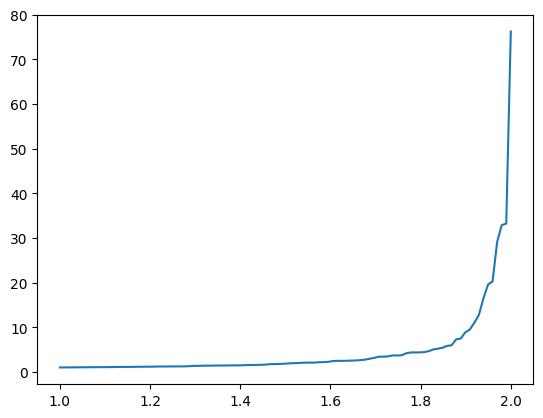

In [81]:
def func(x, tetha):
    return (1 - x) ** (1 / (1 - tetha))


np.random.seed(42)

sample = [func(x, tetha) for x in np.random.sample(n)]
sample.sort()
x = np.linspace(1, 2, 100)
plt.plot(x, sample)
plt.show()

In [82]:
tetha_estimate = n / np.sum(np.log(sample)) + 1
print(f"Оценка методом правдоподобия = {tetha_estimate}")

right = (1.96 * np.log(2) * (2 ** (1 / (tetha_estimate - 1)))) / (tetha_estimate - 1) / 10 + 2 ** (1 / (tetha_estimate - 1))
left = (-(1.96 * np.log(2) * (2 ** (1 / (tetha_estimate - 1)))) / (tetha_estimate - 1) / 10 + 2 ** (1 / (tetha_estimate - 1)))

print(f"Доверительный для медианы: [{left}, {right}]")
print(f"Размах: {right - left}")

Оценка методом правдоподобия = 2.093197205484805
Доверительный для медианы: [1.6509520239261188, 2.119527562950993]
Размах: 0.46857553902487425


In [83]:
left_1 = -1.96 * (tetha_estimate - 1) / np.sqrt(n) + tetha_estimate
right_1 = 1.96 * (tetha_estimate - 1) / np.sqrt(n) + tetha_estimate

print(f"Асимптотический доверительный интервал: [{left}, {right}]")
print(f"Размах {right - left}")

Асимптотический доверительный интервал: [1.6509520239261188, 2.119527562950993]
Размах 0.46857553902487425


In [84]:
def func2(X, N):
    return 1 + N / sum([np.log(x) for x in X])

bootstrap = np.sort(np.array([func2([func(x, tetha) for x in np.random.sample(n)], n) for i in range(50000)]))

left_2 = bootstrap[int(a / 2 * 50000)]
right_2 = bootstrap[int((1 - a / 2) * 50000)]

print(f"Бутстраповский параметрический интервал: [{left_2, right_2}")
print(f"Размах { right_2 - left_2}")

Бутстраповский параметрический интервал: [(1.8295325528748796, 2.2285765209477155)
Размах 0.39904396807283593


In [85]:
bootstrap = np.array([])
for i in range(1000):
    bootstrap = np.append(bootstrap, n / np.sum(np.log((np.random.choice(sample, size = len(sample))))) + 1 - tetha_estimate)

bootstrap = np.sort(bootstrap)

left_3 = tetha_estimate + bootstrap[74]
right_3 = tetha_estimate + bootstrap[974]

print(f"Бутстраповский непараметрический интервал [{left_3, right_3}")
print(f"Размах {left_3, right_3}")

Бутстраповский непараметрический интервал [(1.9597834232072582, 2.3569914251114703)
Размах (1.9597834232072582, 2.3569914251114703)


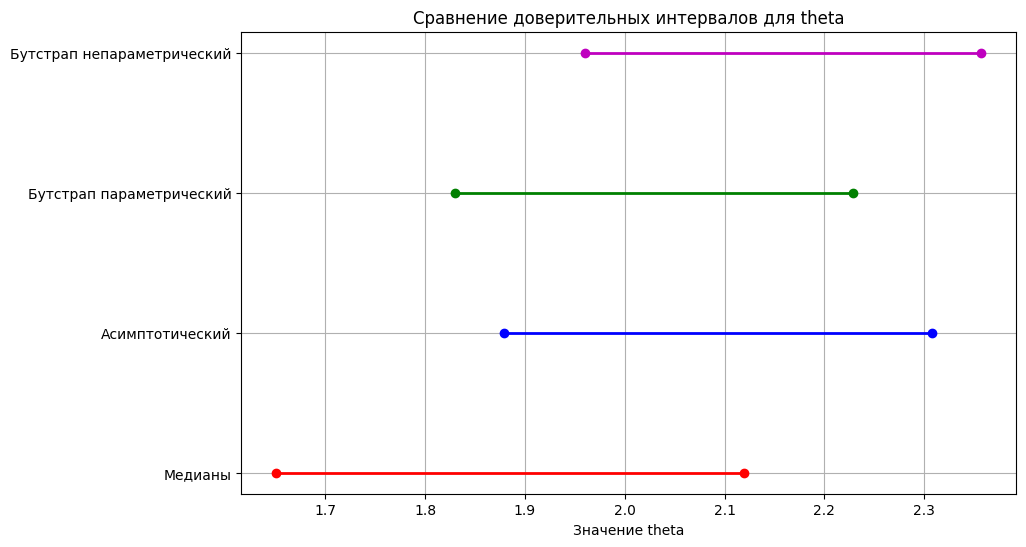

In [86]:
# Визуализация всех интервалов
plt.figure(figsize=(10, 6))

# Интервал для медианы
plt.plot([left, right], [1, 1], 'ro-', label='Медианы', linewidth=2)

# Асимптотический интервал
plt.plot([left_1, right_1], [2, 2], 'bo-', label='Асимптотический', linewidth=2)

# Бутстраповский параметрический интервал
plt.plot([left_2, right_2], [3, 3], 'go-', label='Бутстрап параметрический', linewidth=2)

# Бутстраповский непараметрический интервал
plt.plot([left_3, right_3], [4, 4], 'mo-', label='Бутстрап непараметрический', linewidth=2)

# Настройка графика
plt.yticks([1, 2, 3, 4], ['Медианы', 'Асимптотический', 'Бутстрап параметрический', 'Бутстрап непараметрический'])
plt.xlabel('Значение theta')
plt.title('Сравнение доверительных интервалов для theta')
#plt.legend()
plt.grid(True)
plt.show()